In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ev_load_fc.config import CFG, resolve_path
from ev_load_fc.preprocessing.analysis import plot_time_series

processed_data_path = resolve_path(CFG["paths"]["processed_data"])
min_timestamp     = pd.to_datetime(CFG["data"]['raw_filters']["min_timestamp"])
max_timestamp     = pd.to_datetime(CFG["data"]['raw_filters']["max_timestamp"])
agg_period  = CFG["data"]['preprocessing']["aggregation_period"]

ev_train = pd.read_csv(processed_data_path / 'ev_train.csv', index_col='timestamp')
ev_test = pd.read_csv(processed_data_path / 'ev_test.csv', index_col='timestamp')

temperature_train = pd.read_csv(processed_data_path / 'temperature_train.csv')
temperature_test = pd.read_csv(processed_data_path / 'temperature_test.csv')

train = pd.read_csv(processed_data_path / 'train.csv', index_col='timestamp',parse_dates=['timestamp'])

In [2]:
date_range = pd.date_range(start=min_timestamp, end=max_timestamp-pd.Timedelta(hours=1), freq=agg_period)
split_index = int(len(date_range) * 0.8)

In [3]:
df = pd.DataFrame(date_range, columns=['ts'])
df['dummy'] = 0
df = df.set_index('ts')

df_cut = df.index

In [4]:
print(ev_train.shape)
print(ev_test.shape)

(17520, 2)
(5112, 2)


In [5]:
display(ev_train)

,energy,outlier
timestamp,,
2017-08-01 00:00:00,0.000000,0
2017-08-01 01:00:00,0.000000,0
2017-08-01 02:00:00,0.000000,0
2017-08-01 03:00:00,0.000000,0
2017-08-01 04:00:00,0.000000,0
...,...,...
2019-07-31 19:00:00,39.765000,0
2019-07-31 20:00:00,1.056000,0
2019-07-31 21:00:00,84.604307,1


In [6]:
display(ev_test)

,energy,outlier
timestamp,,
2019-08-01 00:00:00,0.000,0
2019-08-01 01:00:00,0.000,0
2019-08-01 02:00:00,0.000,0
2019-08-01 03:00:00,0.000,0
2019-08-01 04:00:00,0.000,0
...,...,...
2020-02-29 19:00:00,94.372,0
2020-02-29 20:00:00,7.019,0
2020-02-29 21:00:00,9.245,0


In [7]:
print(ev_train.index.min())
print(ev_train.index.max())
print(ev_test.index.min())
print(ev_test.index.max())

2017-08-01 00:00:00
2019-07-31 23:00:00
2019-08-01 00:00:00
2020-02-29 23:00:00


In [8]:
temperature_train

,timestamp,temp,hour,dayofyear
0,2017-08-01 00:00:00,24.4,0,213
1,2017-08-01 01:00:00,22.8,1,213
2,2017-08-01 02:00:00,21.1,2,213
3,2017-08-01 03:00:00,19.4,3,213
4,2017-08-01 04:00:00,17.4,4,213
...,...,...,...,...
17515,2019-07-31 19:00:00,22.2,19,212
17516,2019-07-31 20:00:00,25.0,20,212
17517,2019-07-31 21:00:00,24.8,21,212
17518,2019-07-31 22:00:00,26.1,22,212


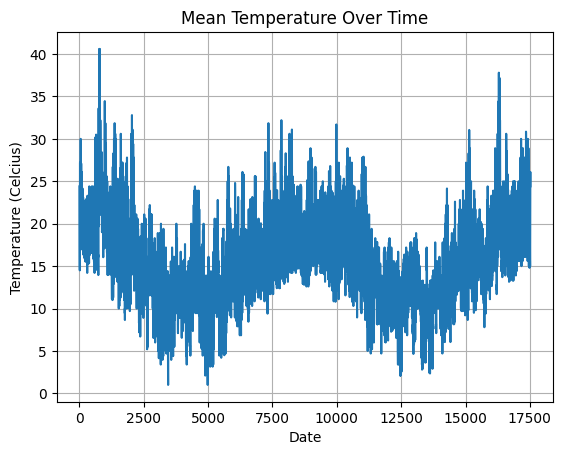

In [5]:
start = int(len(temperature_test)*0.5) 
end = start+30*24
plt.plot(temperature_train.iloc[:]['temp'])
plt.title(f"Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)
plt.show()

In [3]:
train.describe()

,energy,energy_outlier,fog_moderate_dur,fog_severe_dur,rain_heavy_dur,rain_light_dur,rain_moderate_dur,storm_severe_dur,temp,distance_congestion_0,...,distance_flow-incident_2,distance_flow-incident_3,duration_congestion_0,duration_congestion_1,duration_congestion_2,duration_event_1,duration_flow-incident_0,duration_flow-incident_1,duration_flow-incident_2,duration_flow-incident_3
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,...,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,41.612985,0.201142,4.000080,0.315753,0.004566,4.732988,0.157417,0.099486,15.345016,0.747753,...,0.234346,0.002667,15.195579,47.178056,11.654411,0.085043,1.100898,1.782474,1.152470,0.090006
std,43.290429,0.400865,18.279649,4.889085,0.440645,20.648140,2.806755,2.297245,5.147018,2.319358,...,1.858145,0.078942,49.709348,97.732745,35.918020,2.036181,7.946216,9.747354,7.866112,1.757912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.950000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.417000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.442250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.300000,0.000000,...,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,281.852000,1.000000,180.000000,167.000000,56.000000,180.000000,95.000000,60.000000,40.600000,43.080000,...,39.909247,4.400000,832.093410,822.000000,520.418682,60.000000,258.256046,215.418682,180.000000,57.566667
